# III. Tackling the Double Words Challenge

Counting keywords that are made up of more than one word

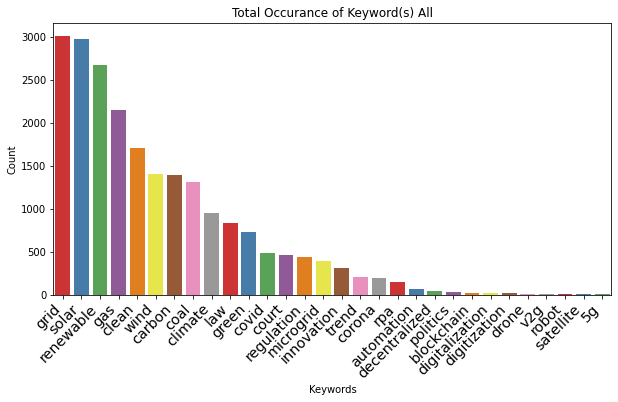

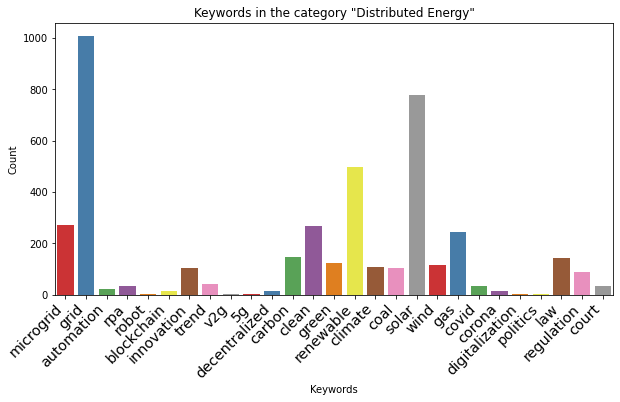

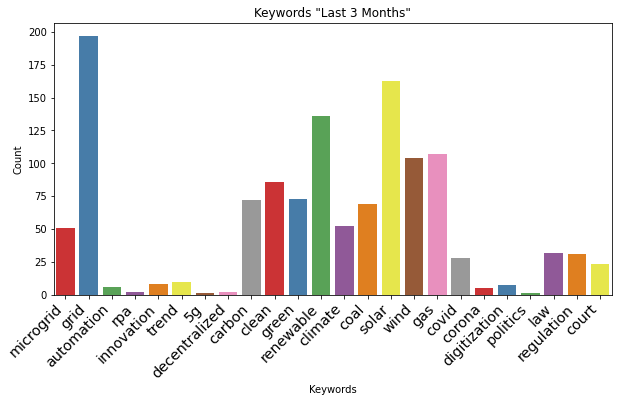

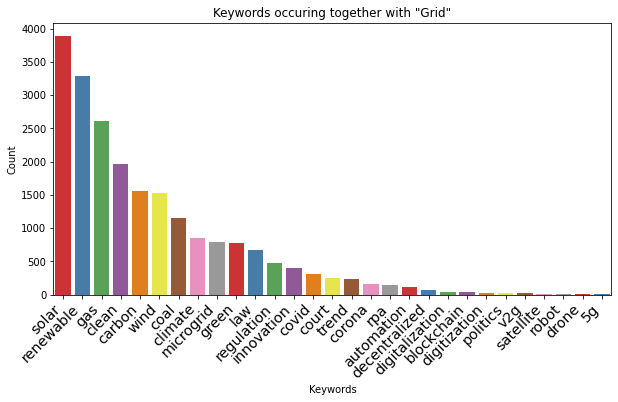

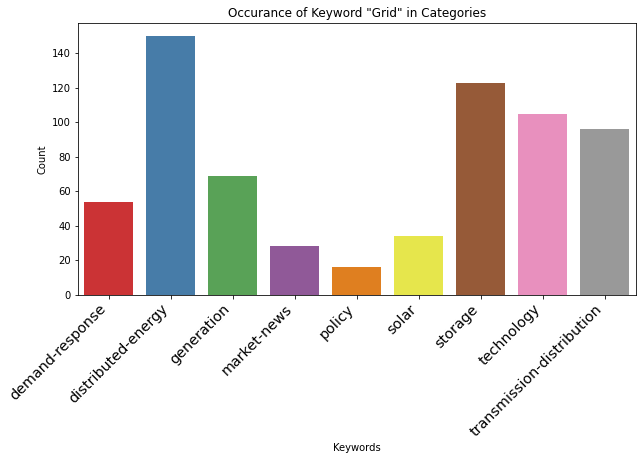

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import *
from ipynb.fs.full.SingleKeywords import keyword_plot, sort_keyword_frame

In [8]:
data = pd.read_csv('../data/preprocessed/10_02PreProUDText.csv')
data = data.drop(columns={'Unnamed: 0'})
data['Date']=pd.to_datetime(data['Date'],format='%b %d %Y')

In [9]:
# Working with all keywords that are made of two different words
keyword_list = []
with open("../data/raw/doublekeywords.txt","r") as file:
        keyword_list = list(file.readlines())    
        
# Removed ML and AI since they are not counted right
keyword_list = [word.rstrip() for word in keyword_list]
keyword_list = [word.lower() for word in keyword_list]
#Remove Duplications
keyword_list = list(dict.fromkeys(keyword_list))

In [10]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
keyword_list = [lemmatizer.lemmatize(word) for word in keyword_list]

In [11]:
keyword_list

['micro grid',
 'smart grid',
 'peer to peer',
 'artificial intelligence',
 'machine learning',
 'distributed ledger',
 'new technology',
 'smart communities',
 'smart city',
 'predictive maintenance',
 'vehicle to',
 'high frequency',
 'smart meter',
 'edge analytics',
 'iot data',
 'augmented intelligence',
 'augmented reality',
 'virtual reality',
 'virtual assistant',
 'clean energy',
 'climate change']

In [12]:
keywordstart_list =  [word.split()[0] for word in keyword_list]
keywordend_list =  [word.split()[1] for word in keyword_list]

Counting words a bit differently but I am assuming that it works anyways:
 - distributed ledger technology on appearence of 'distributed ledger'
 - only count 'smart meter'
 - Counting 'Vehicle to'
 I am assuming that when the two words are present in combination, the third will be there too!

In [13]:
keywordstart_list

['micro',
 'smart',
 'peer',
 'artificial',
 'machine',
 'distributed',
 'new',
 'smart',
 'smart',
 'predictive',
 'vehicle',
 'high',
 'smart',
 'edge',
 'iot',
 'augmented',
 'augmented',
 'virtual',
 'virtual',
 'clean',
 'climate']

In [14]:
keywordend_list

['grid',
 'grid',
 'to',
 'intelligence',
 'learning',
 'ledger',
 'technology',
 'communities',
 'city',
 'maintenance',
 'to',
 'frequency',
 'meter',
 'analytics',
 'data',
 'intelligence',
 'reality',
 'reality',
 'assistant',
 'energy',
 'change']

In [15]:
len(data['FullTextLemma'])

1390

In [16]:
double_counted = data[['Title']]

In [17]:
for keyword in keyword_list:
    #print(keyword)
    double_counted[keyword] = 0 

<ipython-input-17-24b8b5f1c3ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  double_counted[keyword] = 0


In [18]:
# Counting double Keywords
    # Problems: Words 'virtual' and 'smart' appear multiple times -> Solved
    # Not sure if vehicle to grid is counted correctly
    
for i in range(0, len(data['FullTextLemma'])):
    word = ''
    word_check = 0
    for liste in data.at[i,'FullTextLemma']:
        #reset word 
        if liste == ',':
        
            word = ''
            
        #build word
        if liste.isalnum():
            word = word + liste 
        
        #check if word is in keywordstart_list
        if word in keywordstart_list:   
            #When in keywordstart_list, then save index to check if following word is matching 
            word_check = keywordstart_list.index(word)
            
            
        if word in keywordend_list:
                # A double words has been found!
                w = str(keywordstart_list[word_check]+' '+word)
                
                if w in keyword_list:
                    double_counted.at[i,w] = double_counted.at[i,w] +1
                    
                    
                    word_check = 0
                    word2_check = 0


In [19]:
double_counted.head()

Title  micro grid  smart grid  \
0  propelling the transition digitization bolster...          15           3   
1  following outrage over hurricane isaias respon...           2           0   
2  propelling the transition new and better trans...          19           1   
3  pipeline infrastructure planning in the era of...           0           0   
4  propelling the transition green hydrogen could...           0           0   

   peer to peer  artificial intelligence  machine learning  \
0             0                        1                 2   
1             0                        0                 0   
2             0                        0                 0   
3             0                        0                 0   
4             0                        0                 0   

   distributed ledger  new technology  smart communities  smart city  ...  \
0                   0               2                  0           0  ...   
1                   0               0                  0           0  ...   
2                   0               4                  0           0  ...   
3                   0               0                  0           0  ...   
4                   0               0                  0           0  ...   

   high frequency  smart meter  edge analytics  iot data  \
0               0            0               0         0   
1               0            0               0         0   
2               0            0               0         0   
3               0            0               0         0   
4               0            0               0         0   

   augmented intelligence  augmented reality  virtual reality  \
0                       0                  0                0   
1                       0                  0                0   
2                       0                  0                0   
3                       0                  0                0   
4                       0                  0                0   

   virtual assistant  clean energy  climate change  
0                  0             0               0  
1                  0             0               0  
2                  0             3               0  
3                  0             0               0  
4                  0             1               0  

[5 rows x 22 columns]

In [20]:
doub_df = pd.DataFrame()
for column in double_counted.columns: 
    try:
        doub_df.at[0,column] = double_counted[column].sum()
    except BaseException:
        # Pass to avoid Exception thrown due to the 'Date' column not beeing the right format
        pass

In [21]:
for colum in doub_df.columns:
    if doub_df.at[0,colum] == 0:
        doub_df = doub_df.drop(columns={colum})

In [22]:
doub_df

Title  micro grid  smart grid  \
0  propelling the transition digitization bolster...      1862.0       143.0   

   artificial intelligence  machine learning  distributed ledger  \
0                     31.0              55.0                 2.0   

   new technology  smart city  predictive maintenance  vehicle to  \
0           418.0        81.0                    12.0       210.0   

   high frequency  smart meter  iot data  virtual reality  virtual assistant  \
0            15.0        117.0       5.0              1.0                1.0   

   clean energy  climate change  
0        1266.0           315.0

In [23]:
doub_df.drop(columns={'Title'}).to_csv('../data/analysis/keywords_double_total.csv')

<AxesSubplot:title={'center':'Occurance of Double Keywords'}, xlabel='Keywords', ylabel='Count'>

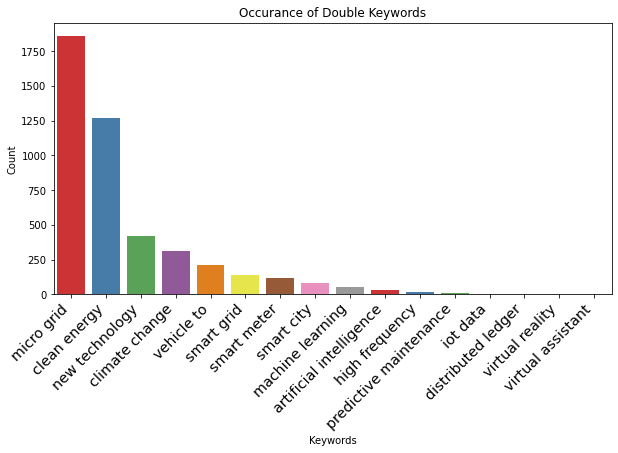

In [24]:
keyword_plot(sort_keyword_frame(doub_df.drop(columns={'Title'})),'Occurance of Double Keywords')

In [25]:
double_counted.to_csv('../data/analysis/keywords_double_count.csv')

In [26]:
# make counting double keywords available for other notebooks:

def count_double_keywords(df):
    counted = df[['Title']]
    for keyword in keyword_list:
        #print(keyword)
        counted[keyword] = 0 
    
    for i in range(0, len(df['FullTextLemma'])):
        word = ''
        word_check = 0
    
        for liste in df.at[i,'FullTextLemma']:
            #reset word 
            if liste == ',':

                word = ''

            #build word
            if liste.isalnum():
                word = word + liste 

            #check if word is in keywordstart_list
            if word in keywordstart_list:   
                #When in keywordstart_list, then save index to check if following word is matching 
                word_check = keywordstart_list.index(word)


            if word in keywordend_list:
                    # A double words has been found!
                    w = str(keywordstart_list[word_check]+' '+word)
                    ## Need to put word together?? i think here is a mistake


                    if w in keyword_list:
                        counted.at[i,w] = counted.at[i,w] +1

                        #print('Found word: ' + keywordstart_list[word_check]+' '+word)
                        #print('Saved at: '+str(double_counted.loc[i]) )

                        word_check = 0
                        word2_check = 0
    return counted

In [27]:
test = count_double_keywords(data)

<ipython-input-26-cc0d1e2c5943>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counted[keyword] = 0


In [28]:
test

Title  micro grid  \
0     propelling the transition digitization bolster...          15   
1     following outrage over hurricane isaias respon...           2   
2     propelling the transition new and better trans...          19   
3     pipeline infrastructure planning in the era of...           0   
4     propelling the transition green hydrogen could...           0   
...                                                 ...         ...   
1385  how new ideas of mobility will shape public ev...           5   
1386  new york utilities propose cybersecurity proto...           2   
1387  how oncor is preparing for a wave of large ele...           0   
1388  seattle mayor proposes ev readiness requiremen...           0   
1389  energy transition carbon capture is clean ener...           0   

      smart grid  peer to peer  artificial intelligence  machine learning  \
0              3             0                        1                 2   
1              0             0                        0                 0   
2              1             0                        0                 0   
3              0             0                        0                 0   
4              0             0                        0                 0   
...          ...           ...                      ...               ...   
1385           3             0                        0                 0   
1386           0             0                        0                 0   
1387           0             0                        0                 0   
1388           0             0                        0                 0   
1389           0             0                        0                 0   

      distributed ledger  new technology  smart communities  smart city  ...  \
0                      0               2                  0           0  ...   
1                      0               0                  0           0  ...   
2                      0               4                  0           0  ...   
3                      0               0                  0           0  ...   
4                      0               0                  0           0  ...   
...                  ...             ...                ...         ...  ...   
1385                   0               0                  0           1  ...   
1386                   0               0                  0           0  ...   
1387                   0               0                  0           0  ...   
1388                   0               0                  0           0  ...   
1389                   0               2                  0           0  ...   

      high frequency  smart meter  edge analytics  iot data  \
0                  0            0               0         0   
1                  0            0               0         0   
2                  0            0               0         0   
3                  0            0               0         0   
4                  0            0               0         0   
...              ...          ...             ...       ...   
1385               0            0               0         0   
1386               0            0               0         0   
1387               0            0               0         0   
1388               0            0               0         0   
1389               0            0               0         0   

      augmented intelligence  augmented reality  virtual reality  \
0                          0                  0                0   
1                          0                  0                0   
2                          0                  0                0   
3                          0                  0                0   
4                          0                  0                0   
...                      ...                ...              ...   
1385                       0                  0                0   
1386      

# Hypecycle

In [29]:
hype_list = []
with open("../data/raw/hypecycle.txt","r") as file:
        hype_list = list(file.readlines())    

In [30]:
hype_list

['Technology Trigger\n',
 'Peak of Inflated Expectations\n',
 'Trough of Disillusionment\n',
 'Slope of Enlightenment\n',
 'Plateau of Productivity']

In [31]:
hype_list = [word.rstrip() for word in hype_list]
hype_list = [word.lower() for word in hype_list]
#Remove Duplications
hype_list = list(dict.fromkeys(hype_list))

In [38]:
hype_list[0]

'technology trigger'

In [44]:
i=0
for t in data['Fulltext']:
    if hype_list[0] in t:
        print(hype_list[0])
    elif  hype_list[1] in t:
        print(hype_list[1])
    elif  hype_list[2] in t:
        print(hype_list[2])    
    elif  hype_list[3] in t:
        print(hype_list[3])
    elif  hype_list[4] in t:
        print(hype_list[4])
    else:
        if i<1:
            print("No Hype Cycle Words found!")
        
        i=i+1

No Hype Cycle Words found!


In [42]:
if hype_list[0] in "this is a technology trigger, really":
    print("True")

True
